# Importing Libraries

In [55]:
from tensorflow.keras.layers import Input, InputLayer, Dense, Flatten, Conv2D,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import  Model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, cv2
import random
import scipy
import PIL

# Getting Data

In [7]:
data_path='D:/amitavsir/bcd/datacompressed/train'
list_folder=os.listdir(path = data_path)
data=[]
im_size=121    
for i in list_folder:
    new_path=os.path.join(data_path,i) 
    pic_list=os.listdir(new_path)                                               
    for img in pic_list:
        pic=os.path.join(new_path,img)   
        arr=cv2.imread(pic)    
        data.append([arr,list_folder.index(i)])    
        
random.shuffle(data)  
x_train,y_train=[],[]
for i,j in data:
    x_train.append(i)
    y_train.append(j)
x_train=np.array(x_train).reshape(-1,im_size,im_size,3)
y_train=np.array(y_train).reshape(-1,1)

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train)
x_train = x_train/255
y_train = y_train.toarray()

data_path='D:/amitavsir/bcd/datacompressed/validation'
list_folder=os.listdir(path = data_path)
data=[]
im_size=121    
for i in list_folder:
    new_path=os.path.join(data_path,i) 
    pic_list=os.listdir(new_path)                                               
    for img in pic_list:
        pic=os.path.join(new_path,img)   
        arr=cv2.imread(pic)    
        data.append([arr,list_folder.index(i)])    
        
random.shuffle(data)  
x_test,y_test=[],[]
for i,j in data:
    x_test.append(i)
    y_test.append(j)
x_test=np.array(x_test).reshape(-1,im_size,im_size,3)
y_test=np.array(y_test).reshape(-1,1)

encoder = OneHotEncoder()
y_test = encoder.fit_transform(y_train)
x_test = x_test/255
y_test = y_test.toarray()


X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=0.20)

print('Dimensions of images:',X_train.shape[1:3])
print('Number of images in training set :',Y_train.shape[0])
print('Number of images in testing set :',X_test.shape[0])

Dimensions of images: (121, 121)
Number of images in training set : 769
Number of images in testing set : 193


# Model Architecture

In [71]:
opt1 = Adam(learning_rate = 0.001)
opt2 = Adam(learning_rate = 0.002)
opt3 = Adam(learning_rate = 0.0015)
opt4 = Adam(learning_rate = 0.005)
#opt2 = RMSprop(learning_rate = 0.001)

inputShape=(121,121,3)
input1 = Input(inputShape)

x = Conv2D(64,(3,3), name='layer_conv3', activation = 'relu')(input1)
x = MaxPooling2D((2,2), name = 'max_pool3')(x)
x = Conv2D(64,(3,3), name='layer_conv4', activation = 'relu')(x)
x = MaxPooling2D((2,2), name = 'max_pool4')(x)
x = Conv2D(128,(2,2), name='layer_conv5', activation = 'relu')(x)
x = MaxPooling2D((2,2), name = 'max_pool5')(x)
x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.15)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(4, activation = 'softmax',name='op')(x)
classifier = Model(inputs = input1, outputs = x, name = 'Predict')
classifier.compile(optimizer = opt2 , loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 121, 121, 3)]     0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 119, 119, 64)      1792      
_________________________________________________________________
max_pool3 (MaxPooling2D)     (None, 59, 59, 64)        0         
_________________________________________________________________
layer_conv4 (Conv2D)         (None, 57, 57, 64)        36928     
_________________________________________________________________
max_pool4 (MaxPooling2D)     (None, 28, 28, 64)        0         
_________________________________________________________________
layer_conv5 (Conv2D)         (None, 27, 27, 128)       32896     
_________________________________________________________________
max_pool5 (MaxPooling2D)     (None, 13, 13, 128)       0   

In [72]:
history = classifier.fit(X_train, Y_train, batch_size = 10, epochs = 40, shuffle = True,
                         validation_data=(X_test, Y_test))

Train on 769 samples, validate on 193 samples
Epoch 1/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3973 - acc: 0.2601 - val_loss: 1.4009 - val_acc: 0.1710
Epoch 2/40
769/769 [==============================] - 14s 18ms/sample - loss: 1.3879 - acc: 0.2393 - val_loss: 1.3845 - val_acc: 0.2746
Epoch 3/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3830 - acc: 0.2575 - val_loss: 1.3770 - val_acc: 0.2746
Epoch 4/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3868 - acc: 0.2510 - val_loss: 1.3854 - val_acc: 0.2746
Epoch 5/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3873 - acc: 0.2705 - val_loss: 1.3812 - val_acc: 0.2746
Epoch 6/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3882 - acc: 0.2354 - val_loss: 1.3865 - val_acc: 0.2746
Epoch 7/40
769/769 [==============================] - 15s 19ms/sample - loss: 1.3860 - acc: 0.2640 - val_loss: 1.3850 - val_acc: 0.2746
Ep

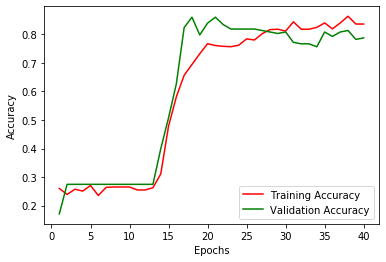

In [73]:
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
preds = classifier.predict(X_test)
actual = []
predictions = []
for i in range(len(preds)):
    actual.append(np.argmax(Y_test[i]))
    predictions.append(np.argmax(preds[i]))

In [75]:
a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4 = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
for j in range(len(actual)):
    if actual[j] == 0:
        if predictions[j] == 0:
            a1 += 1
        elif predictions[j] == 1:
            a2 += 1
        elif predictions[j] == 2:
            a3 += 1
        else:
            a4 += 1
    elif actual[j] == 1:
        if predictions[j] == 0:
            b1 += 1
        elif predictions[j] == 1:
            b2 += 1
        elif predictions[j] == 2:
            b3 += 1
        else:
            b4 += 1
    elif actual[j] == 2:
        if predictions[j] == 0:
            c1 += 1
        elif predictions[j] == 1:
            c2 += 1
        elif predictions[j] == 2:
            c3 += 1
        else:
            c4 += 1
    elif actual[j] == 3:
        if predictions[j] == 0:
            d1 += 1
        elif predictions[j] == 1:
            d2 += 1
        elif predictions[j] == 2:
            d3 += 1
        else:
            d4 += 1

In [76]:
def h_mean(x,y):
    return (2*(x*y)/(x+y))

In [77]:
#flair
tpf = a1
fpf = b1+c1+d1
fnf = a2+a3+a4
precision_flair = tpf/(tpf + fpf)
recall_flair = tpf/(tpf+fnf)
try:
    F1_flair = h_mean(precision_flair, recall_flair)
    print('The F1 score for flair class is :', F1_flair)
except:
    print('Sorry division by zero')

#t1
tpt1 = b2
fpt1 = a2+c2+d2
fnt1 = b1+b3+b4
precision_t1 = tpt1/(tpt1 + fpt1)
recall_t1 = tpt1/(tpt1+fnt1)
try:
    F1_t1 = h_mean(precision_t1, recall_t1)
    print('The F1 score for t1 class is :', F1_t1)
except:
    print('Sorry division by zero')

#t1ce
tpt1ce = c3
fpt1ce = a3+b3+d3
fnt1ce = c1+c2+c4
try:
    precision_t1ce = tpt1ce/(tpt1ce + fpt1ce)
    recall_t1ce = tpt1ce/(tpt1ce+fnt1ce)
    F1_t1ce = h_mean(precision_t1ce, recall_t1ce)
    print('The F1 score for t1ce class is :', F1_t1ce)
except:
    print('Sorry division by zero, therefore = 0')
      
#t2
tpt2 = d4
fpt2 = a4+b4+c4
fnt2 = d1+d2+d3
try:
    precision_t2 = tpt2/(tpt2 + fpt2)
    recall_t2 = tpt2/(tpt2+fnt2)
    F1_t2 = h_mean(precision_t2, recall_t2)
    print('The F1 score for t2 class is :', F1_t2)
except:
    print('Sorry division by zero')
    
print('\nAverage F1 score is: ', (F1_flair+F1_t1+F1_t1ce+F1_t2)/4)

The F1 score for flair class is : 0.7592592592592593
The F1 score for t1 class is : 0.7304347826086955
The F1 score for t1ce class is : 0.696969696969697
The F1 score for t2 class is : 0.9484536082474228

Average F1 score is:  0.7837793367712687


In [78]:
table = [[a1,b1,c1,d1], [a2,b2,c2,d2], [a3,b3,c3,d3], [a4,b4,c4,d4]]
table = np.array(table)

confusion_matrix = pd.DataFrame(data = table, index = ['flair', 't1', 't1ce', 't2'], columns = ['flair', 't1', 't1ce', 't2'] )

confusion_matrix

,flair,t1,t1ce,t2
flair,41,5,4,0
t1,15,42,5,0
t1ce,2,5,23,3
t2,0,1,1,46


# K-Fold

In [ ]:
num_folds=10

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1

In [ ]:
for train, test in kfold.split(inputs, targets):
    inputShape=(121,121,3)
    input1 = Input(inputShape)

    x = Conv2D(32,(3,3), name='layer_conv3', activation = 'relu')(input1)
    x = MaxPooling2D((2,2), name = 'max_pool3')(x)
    x = Conv2D(64,(3,3), name='layer_conv4', activation = 'relu')(x)
    x = MaxPooling2D((2,2), name = 'max_pool4')(x)
    x = Conv2D(128,(2,2), name='layer_conv5', activation = 'relu')(x)
    x = MaxPooling2D((2,2), name = 'max_pool5')(x)
    x = Flatten()(x)
    x = Dense(64,activation = 'relu',name='fc0')(x)
    x = Dropout(0.15)(x)
    x = Dense(32,activation = 'relu',name='fc1')(x)
    x = Dropout(0.10)(x)
    x = Dense(16,activation = 'relu',name='fc2')(x)
    x = Dense(4, activation = 'softmax',name='op')(x)
    classifier = Model(inputs = input1, outputs = x, name = 'Predict')
    classifier.compile(optimizer = opt2 , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

      # Increase fold number
    fold_no = fold_no + 1

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')